# Process Capability Analysis — non-normal data

- In some cases, the data might not be normally distributed. After reviewing the data 
points leading to non-normality, it might be concluded the points must be retained. 
The next step then is to determine if the dataset follows a distribution different 
than normal.
- But if the data does not follow another distribution, and is typically expected to be nor
mally distributed, a data transformation can be considered. But it is recommended 
the analyst consult with a statistician or subject matter expert until expertise is 
gained prior to transforming.

In [1]:
import pandas as pd
import numpy as np
from stats_plots import imr_chart, last25_pp, boxcox
import matplotlib.pyplot as plt
import manufacturing as mn
import scipy.stats as stats
from statistics import stdev
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(xls, 
                   sheet_name="Process Capability",)
        .dropna(how="all")
)
df.columns = df.columns.str.strip()
df.head()

,Brake Caliper Torsion IMR,Unnamed: 1,Airbag tensile strength
0,76.660378,NaN,40.862281
1,80.366125,NaN,13.821355
2,77.246828,NaN,3.924765
3,79.072676,NaN,4.062451
4,77.328160,NaN,5.893562


In [3]:
# Select the column for Individuals chart
col_name = "Airbag tensile strength"
data = df[col_name].dropna().astype(float).values
data

array([40.8622814 , 13.82135518,  3.92476485,  4.06245112,  5.89356209,
        5.05208259,  4.9521981 ,  4.37115295, 53.3343101 ,  8.35334192,
       18.3788783 , 11.8737906 ,  7.29386905,  2.06904623, 16.03787451,
        7.14087222, 20.22395572,  2.68662598,  0.63372369, 12.88322344,
        1.38677808, 17.96658806,  8.96269342,  1.7018538 ,  3.62611787,
        6.83519892, 19.10703198,  0.42207305,  5.48362424, 11.53276596])

## IMR Chart

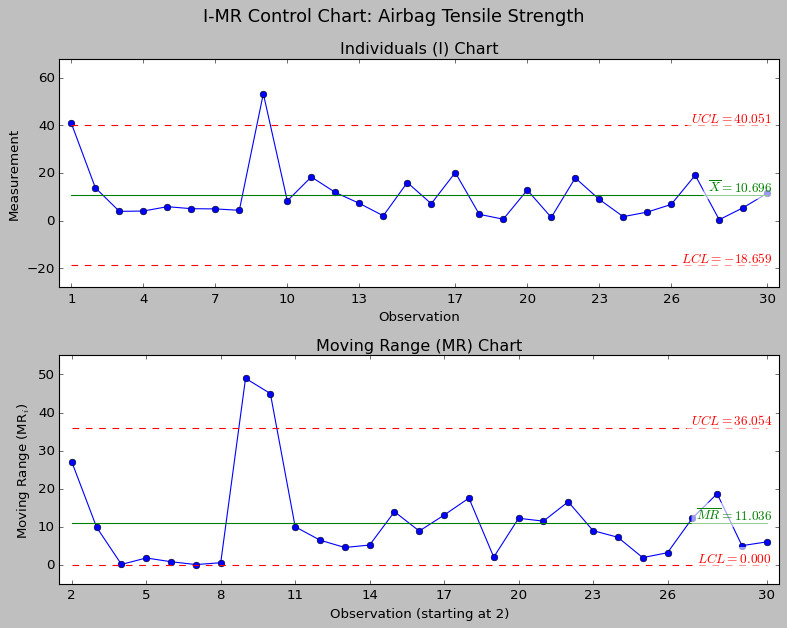

In [4]:
imr_chart(df["Airbag tensile strength"], title="Airbag Tensile Strength")

## Last 25 obervations and Normal Probability Plot

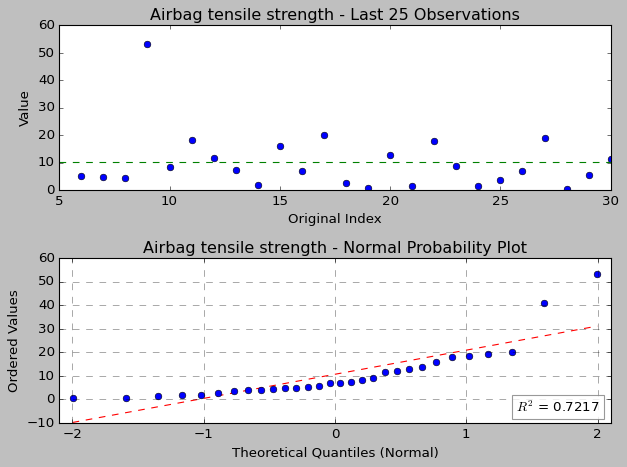

In [9]:
results = last25_pp(data, title_prefix="Airbag tensile strength")

## Capability Histogram

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


<Figure size 800x640 with 0 Axes>

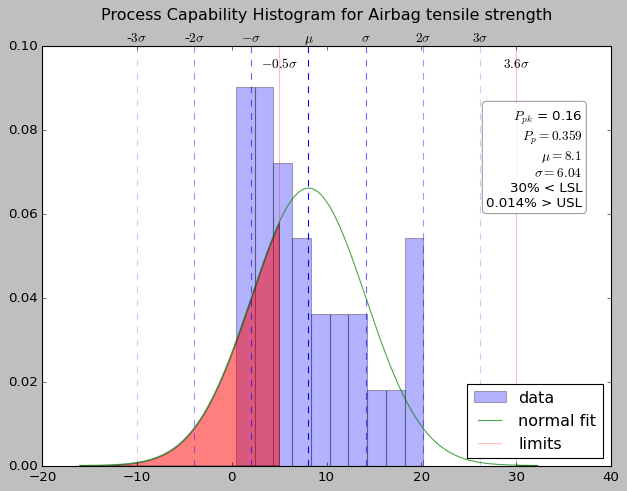

In [6]:
# 🛑 2. Define Specification Limits 🛑
# Replace these values with the actual LSL, USL, and Target for your brake caliper torsion process!
LSL = 5.0  # Example Lower Specification Limit
USL = 30.0 # Example Upper Specification Limit
TARGET = 90.0 # Example Target (Optional, but highly recommended)

# --- 3. Generate Capability Histogram (Ppk Plot) ---
plt.figure(figsize=(10, 8))

# CORRECTED CALL: Target argument is removed
mn.ppk_plot(
    data=data, 
    lower_specification_limit=LSL, 
    upper_specification_limit=USL
    # target=TARGET  <--- NO LONGER INCLUDED
)

plt.title('Process Capability Histogram for Airbag tensile strength',
         y=1.05)
plt.show()

- Shapiro test indicates that the distribution is NOT normal.
- k^2 test indicates that the distribution is NOT normal
- The data set is most likely not normally distributed

## Perform the Box-Cox Transformation

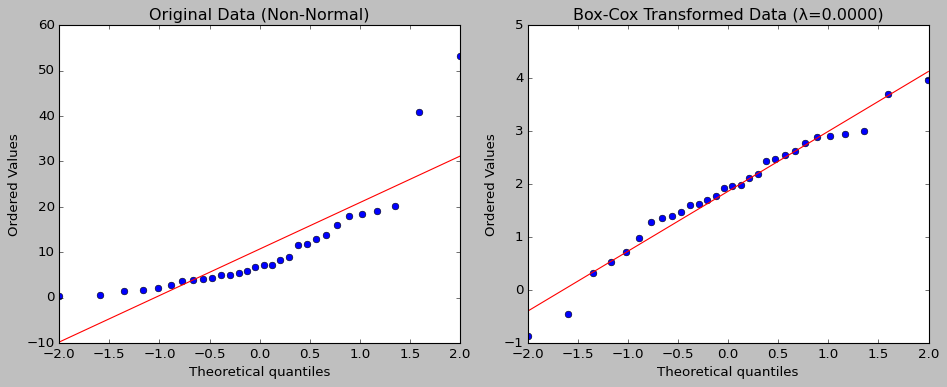


Optimal Lambda (λ): 0.0000
Suggested Transformation: log transform
Transformed USL (USL'): 3.4012
Transformed LSL (LSL'): 1.6094
Transformed Mean (X̄'): 1.8665
Transformed StDev (s'): 1.1053


In [7]:
result = boxcox(
    data=df["Airbag tensile strength"],
    USL=30.0,
    LSL=5.0
)

# Access the returned values
USL_prime = result["USL_prime"]
LSL_prime = result["LSL_prime"]
X_bar_prime = result["X_bar_prime"]
s_prime = result["s_prime"]
transformed_data = result["transformed_data"]

the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits


<Figure size 800x640 with 0 Axes>

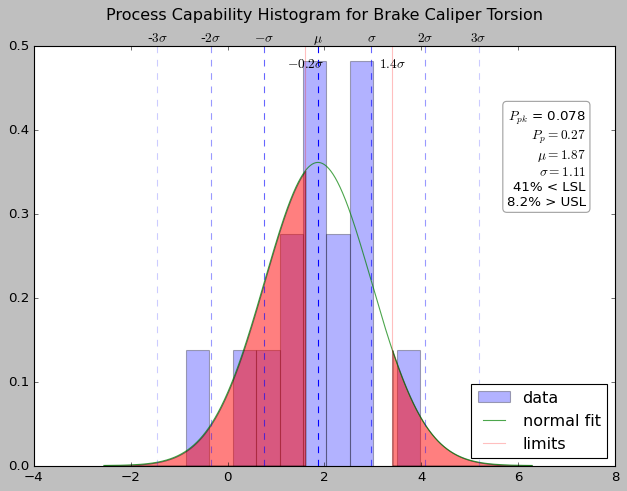

In [8]:
# --- 3. Generate Capability Histogram (Ppk Plot) ---
plt.figure(figsize=(10, 8))

# CORRECTED CALL: Target argument is removed
mn.ppk_plot(
    transformed_data, 
    lower_specification_limit=LSL_prime, 
    upper_specification_limit=USL_prime
    # target=TARGET  <--- NO LONGER INCLUDED
)

plt.title('Process Capability Histogram for Brake Caliper Torsion',
         y=1.05)
plt.show()

- The airbag fabric tensile strength is specified to be between 5 and 30 koz.
- However, Ppk < 1.
- Failed examples were observed.    